# Project: Investigate a Dataset - tmdb-movies

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

>This data set contains informationabout 10,000 movies collected from The Movie Database (TMDb),including user ratings and revenue. They are 10866 rows and 21 columns in the data set. Following is rhe informatio nrelated to the data set for all columns. It has one duplicated row and 9 columns consists of null valued rows.Certain columns, like ‘cast’and ‘genres’, contain multiple values separated by pipe (|)characters. There are some odd characters in the ‘cast’ column.

>Data columns (total 21 columns):
id
imdb_id                 
popularity              
budget                  
revenue                 
original_title         
cast                    
homepage               
director                
tagline                 
keywords               
overview               
runtime                 
genres                  
production_companies    
release_date            
vote_count             
vote_average            
release_year            
budget_adj              
revenue_adj             


### Question(s) for Analysis
Follwoing questions comes to the picture after cleaning up and investigating the data takes place.
>Do popularity ratings of movies based on High Budget/High Revenue/High Vote Count? What kinds of properties are associated with movies that have high revenues?
>How various characteristics of th movies changed over time?
how various characteristics varies for high budget and hig hrevenue movies?


In [1]:
#importing python packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

>Reading data from the tmdb-movies.csv file into data frame df using pandas read_csv function. 


### General Properties
>Identifying the size of the data frame,unnecessary columns, null valued rows for each column, data types of all columns using info function.

In [3]:
#Loading data set
df=pd.read_csv('tmdb-movies.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

### Describing the date for data types for all the columns and for identifying null values

In [4]:
#describing data for the initial assessment
df.describe()
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


###  checking for duplicate rows:

In [5]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10861    False
10862    False
10863    False
10864    False
10865    False
Length: 10866, dtype: bool


### Data Cleaning
> Initially, some columns which are not necessary for data analysis needs to be dropped off.In this data set id,imdb_id, homepage, tagline, keywords and overview columns needs to be dropped off from the data set inorder to make a more cleaner data set. Needs to change the data type for release_date column from object to datetime. Rows containing Null values needs to be removed from the data set. The columns such as genres, production_companies, director and cast consists of null values. These rows need to be removed for more cleaner data set. Duplicate rows needs to be removed and there is a one duplicated row in the data set which needs to be removed.Certain columns, like ‘cast’,'prodution_companies' and ‘genres’, contain multiple values separated by pipe (|) characters.These columns needs to be cleaned and words needs to be seperated for proper data analysis.
 

In [6]:
#dropping columns which are not necessary for data analaysis
df.drop(['id','imdb_id','homepage','tagline','keywords','overview'],axis=1,inplace=True)

In [7]:
#Changing 'release_date' data type from string to datetime
from datetime import datetime
df['release_date'] = pd.to_datetime(df['release_date'], format='%m/%d/%Y',exact=False,infer_datetime_format=True)

In [8]:
#dropping null valuyed rows from all columns
df.dropna(axis=0,inplace=True)


In [9]:
#dropping all duplicated rows
df.drop_duplicates(inplace =True)



In [10]:
# Cleaning multiple valued columns to singled valued columns for consistency
df['cast']=df['cast'].str.split("|",expand=True)[0]
df['director']=df['director'].str.split("|",expand =True)[0]
df['genres']=df['genres'].str.split("|",expand=True)[0]
df['production_companies']=df['production_companies'].str.split("|",expand=True)[0]
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt,Colin Trevorrow,124,Action,Universal Studios,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy,George Miller,120,Action,Village Roadshow Pictures,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley,Robert Schwentke,119,Adventure,Summit Entertainment,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford,J.J. Abrams,136,Action,Lucasfilm,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel,James Wan,137,Action,Universal Pictures,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


<a id='eda'></a>
## Exploratory Data Analysis

### 1. Do popularity ratings of movies based on High Budget/High Revenue/High Vote Count?
Creating bar chart with one group of high poularity and another with low popularity.

In [11]:
# Using query to select each popularity group based on its mean popularity and 
# gets each group's budget, revenue and vote_count
df['popularity'].mean()
pop_high = df.query("popularity > 0.6947")
pop_low = df.query("popularity <=0.6947") 
len(pop_low.index)+len(pop_high.index)==len(df.index)
budget_high=pop_high['budget'].mean()
budget_low=pop_low['budget'].mean()
revenue_high=pop_high['revenue'].mean()
revenue_low=pop_low['revenue'].mean()
vote_high=pop_high['vote_count'].mean()
vote_low=pop_low['vote_count'].mean()

Text(0,0.5,'Average Popularity')

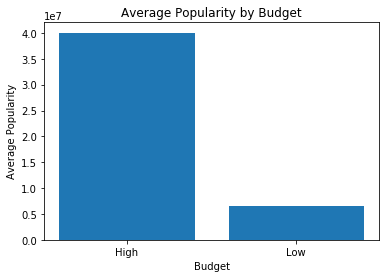

In [12]:
# Creating a bar chart with proper labels for budget versus popularity for each group
locations = [1, 2]
heights = [budget_high, budget_low]
labels = ['High', 'Low']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Popularity by Budget')
plt.xlabel('Budget')
plt.ylabel('Average Popularity')



The above bar chart shows the average populairty vs budget for high popular movies. As it shows, high populairty based movies got highest budgets.

Text(0,0.5,'Average Popularity')

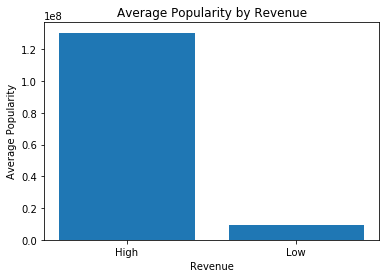

In [13]:
# Creating a bar chart with proper labels for revenue versus popularity for each group
locations = [1, 2]
heights = [revenue_high, revenue_low]
labels = ['High', 'Low']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Popularity by Revenue')
plt.xlabel('Revenue')
plt.ylabel('Average Popularity')

The above bar chart shows the average populairty vs revenue for high popular movies. As it shows, high populairty based movies got higest revenue.

Text(0,0.5,'Average Popularity')

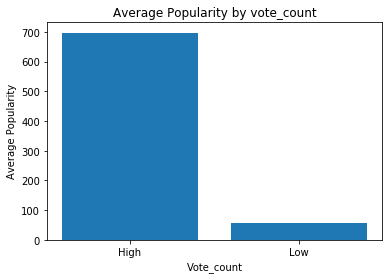

In [14]:
# Creating a bar chart with proper labels for vote_count versus popularity for each group
locations = [1, 2]
heights = [vote_high, vote_low]
labels = ['High', 'Low']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Popularity by vote_count')
plt.xlabel('Vote_count')
plt.ylabel('Average Popularity')

The above bar chart shows the average populairty vs vote count for high popular movies. As it shows, high populairty based movies got higest vote counts.

### 2. What kinds of properties are associated with movies that have high revenues?

In [15]:
#Extracting hogh revenue group movie data by querying with mean_revenue
df['revenue'].mean()
rev_high=df.query('revenue>44231208.9')
rev_low=df.query('revenue<=44231208.9')


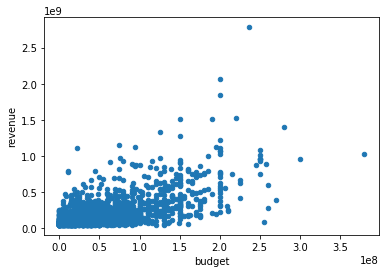

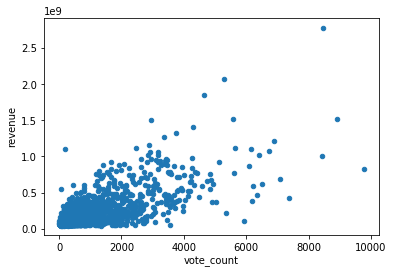

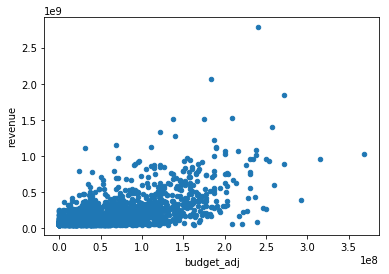

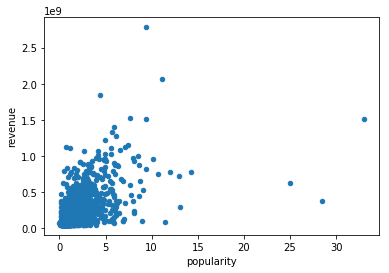

In [16]:
# Plotting various properties versus revenue asscoiated with high revenue data
rev_high.plot.scatter(x='budget',y='revenue')
rev_high.plot.scatter(x='vote_count',y='revenue')
rev_high.plot.scatter(x='budget_adj',y='revenue')
rev_high.plot.scatter(x='popularity',y='revenue')



>The above scatter plots represents the various characteristics distribution over revenue of the movies.Based on the scatter plots of revenue over varioius characteristics shows that not much impact on each variable on the revenue and not directly proportional to each other. For example high popularity is not based on high revenue in fact low revenie movies also hot high pouplar ratings and vicevsers.Same thing observed in case of budget, voter_count etc.

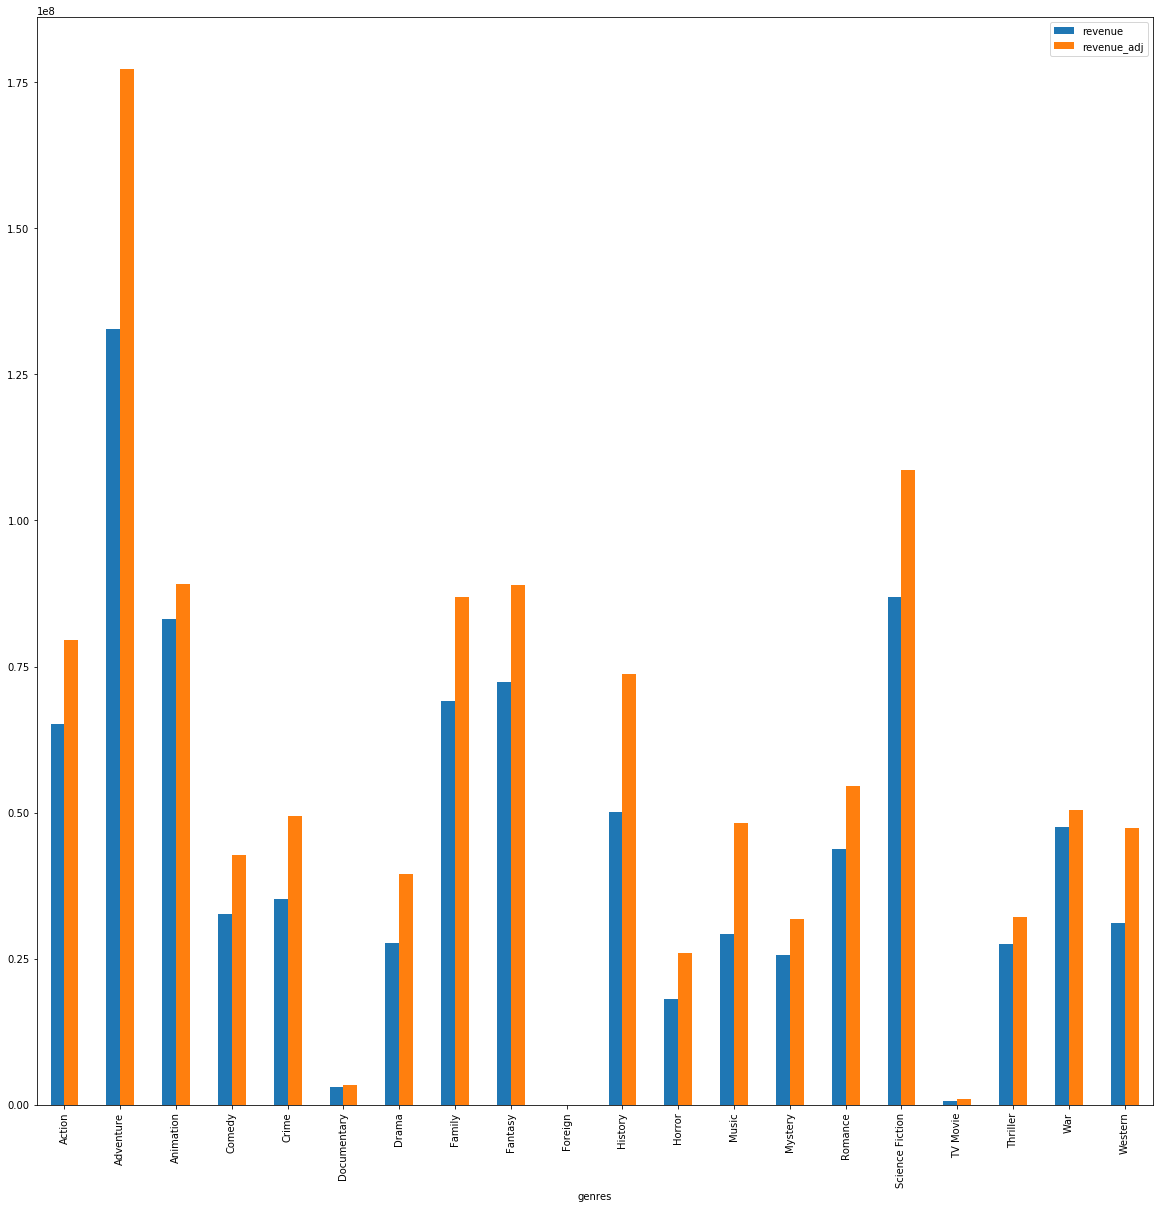

In [17]:
#Grouping various genres on revenue data
df.groupby('genres')['revenue','revenue_adj'].mean().plot(kind='bar',figsize=(20,20))

>The above bar chart shows the how the revenue sistributed among various genres. It shows that animation and scince fiction movies got all time high revenues and the documnetary,tv shows and foreign movies got very low revenues.

### 3. How the various characteristics of the movies changed over time?

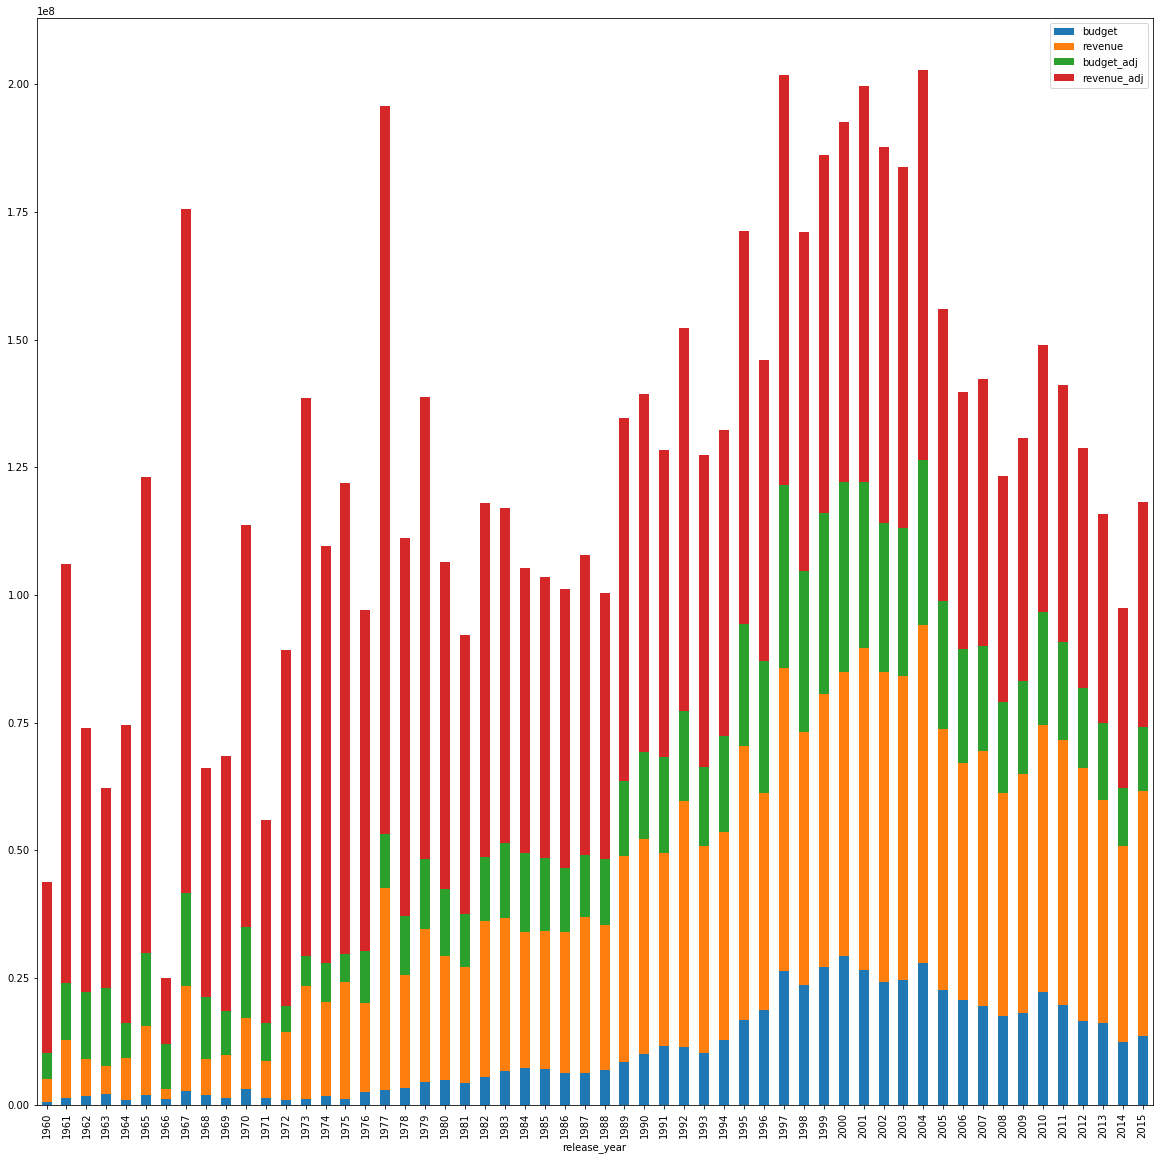

In [18]:
#Grouping by release_year with various characteristics like budget, revenue,vote_count,popularity,budget_adj,revenue_adj
df.groupby(['release_year'])['budget','revenue','budget_adj','revenue_adj'].mean().plot(kind='bar',stacked=True,figsize=(20,20))


>The above stacked bar chart shoes the budget,revenue distributions over the years for the films.In teh years 1997 -2005 the films gor highest revenue and high budgeted films were undertaken.In the year 1967,1977 also high revenue and high budeting happens in the film industry.

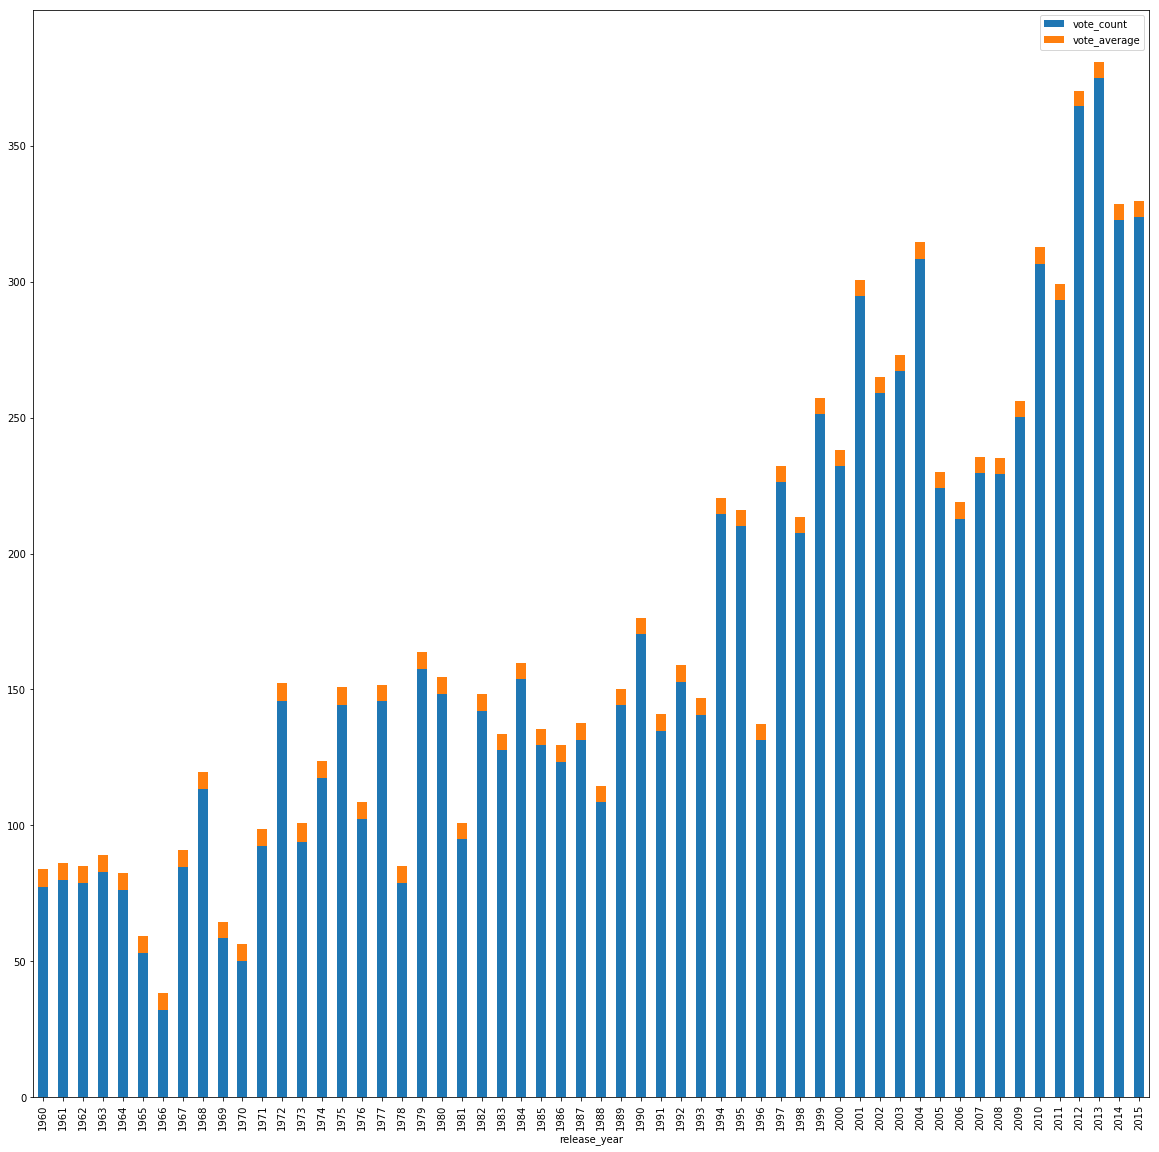

In [19]:
df.groupby(['release_year'])['vote_count','vote_average'].mean().plot(kind='bar',stacked=True,figsize=(20,20))


> The above stacked bar chart represents the average vote count and mean vote aberage of the films over years.The overall graph incresing over years and in the years 2012 and 2013 voters voted maximum for all the films in those years.

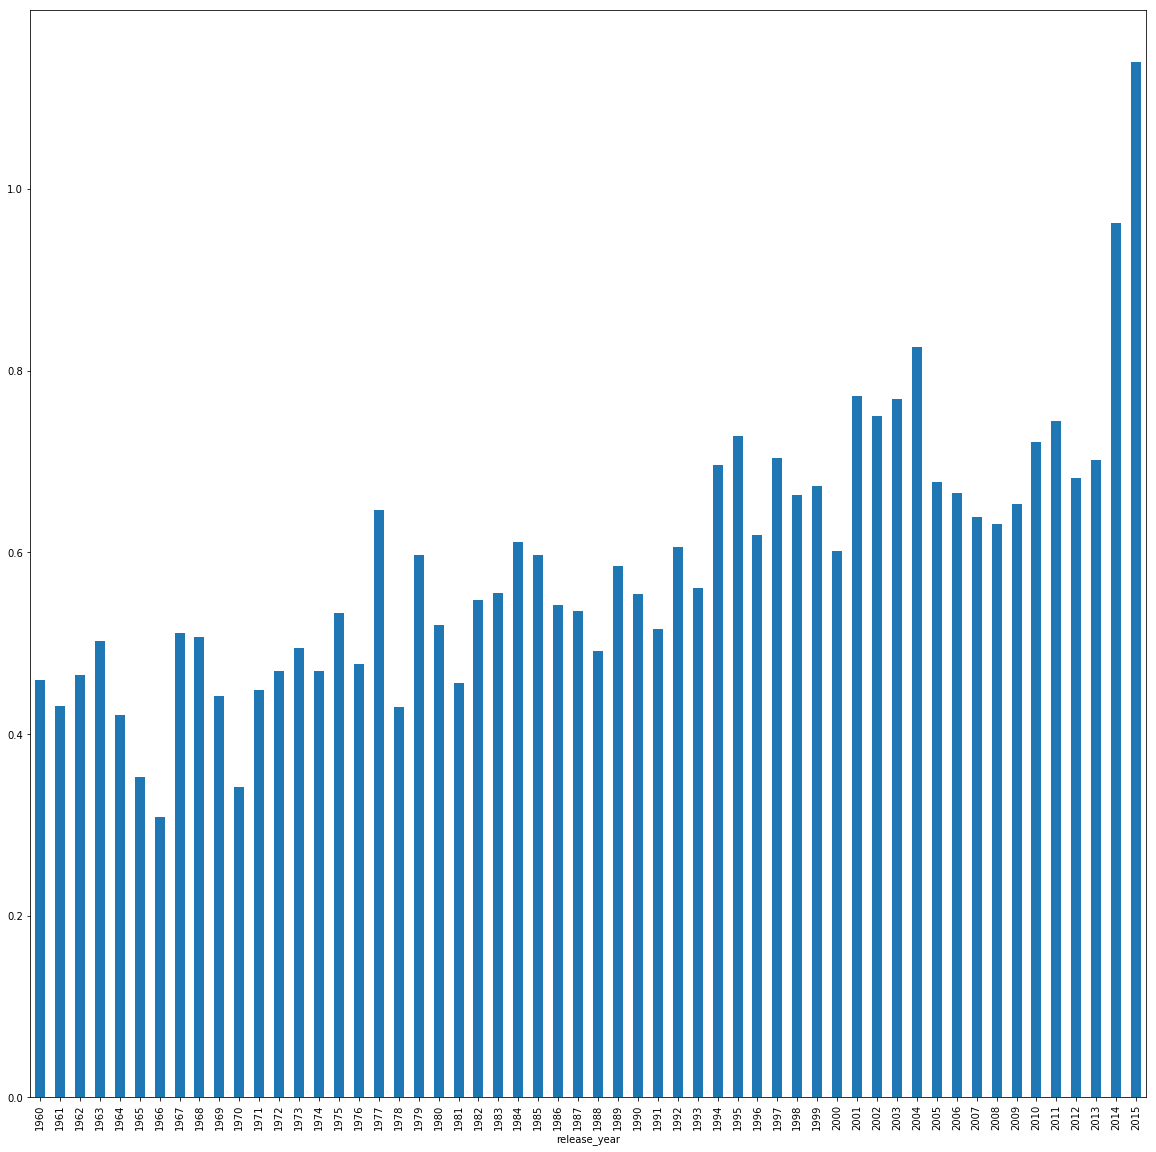

In [20]:
#Plotting release_year vs popularity
df.groupby(['release_year'])['popularity'].mean().plot(kind='bar',stacked=True,figsize=(20,20))

>The above bar chart represents the  mean populairty of the movies varies over years.It shows the popularity at its peak in 2014 and 2015. The overall graph looks an increasing curve over years.

### 4. How the various characteristics varies for high revnued and high budget movies

In [21]:
#Getting mean budget and extracting high budget movie data from the existing dat frame using query function
df['budget'].mean()
bud_rev_high=df.query('budget>16179667.9'and 'revenue>44231208.9')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9cf2145828>,
      dtype=object)

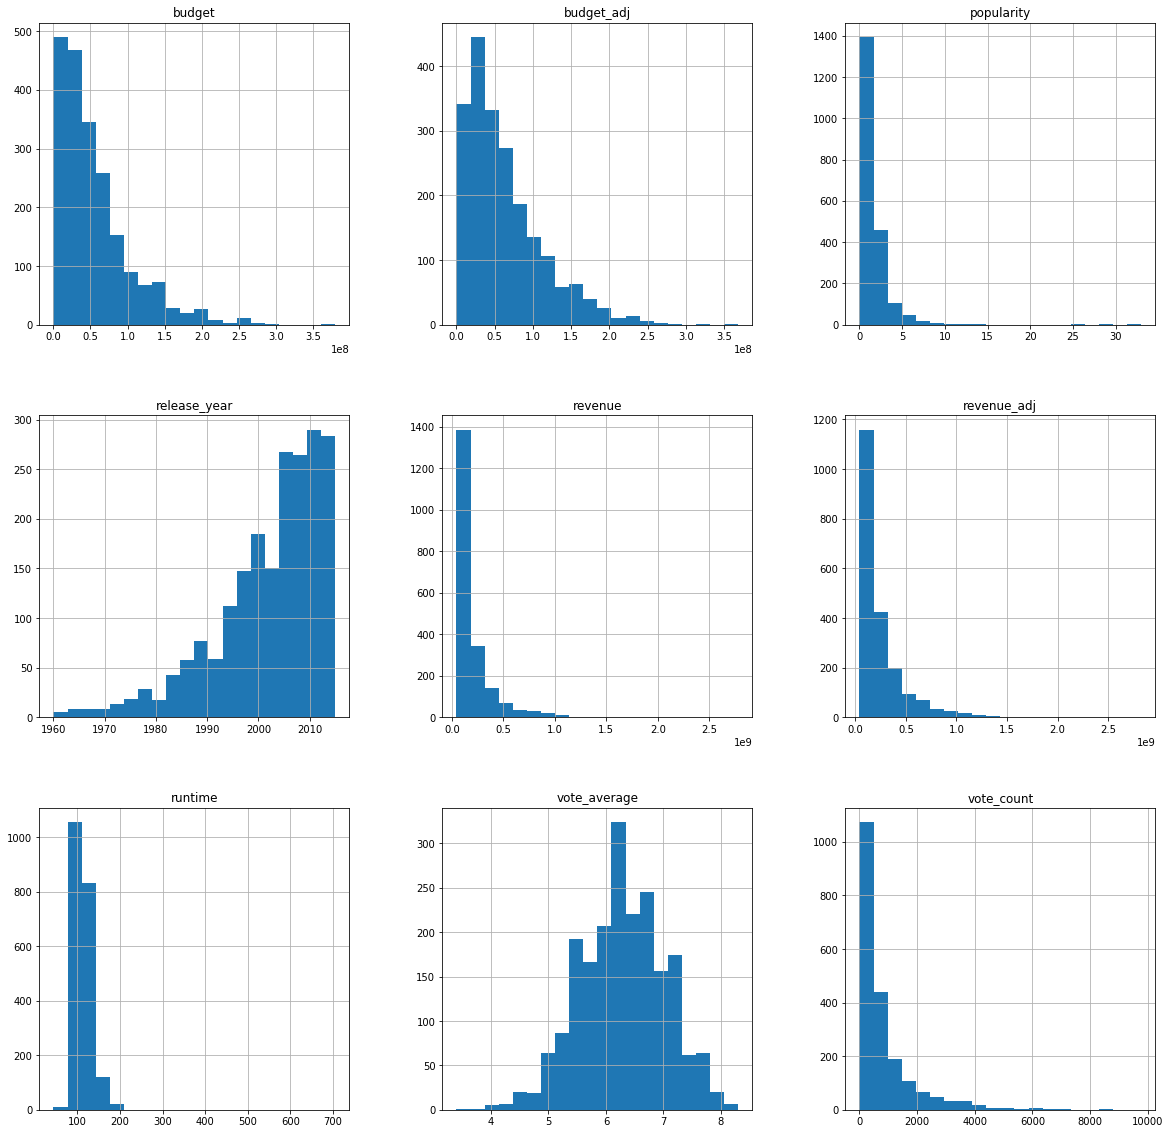

In [22]:
#Plotting histograms for various characteristics
bud_rev_high.hist(figsize=(20,20),bins=20)

The baove histograms represents, how the various characteristics varies for high revnued and high budget movies.All the characteristics except the vote_average and release_year were skewed right to median line for high budget and high revenue movies.For the vote_average it skewed to left and also for the release_year.

<a id='conclusions'></a>
## Conclusions

> While trying to get conclusions through the analysis of popularity ratings of movies based on High Budget/High Revenue/High Vote Count, the high budget/high revenue/high vote_count movies are more popular than the lowbudget/low revenue/loe vote_count movies are less poupular. It says that the Popularity highly depends on budget,revenue and vote count.

>  From the analysis of second question, What kinds of properties are associated with movies that have high revenues?adventure,science_fiction genres got highest revenues and documntaries,foreign and tv shows got less revenues.Based on the scatter plots of revenue over varioius characteristics shows that not much impact on each variable on the revenue and not directly proportional to each other. For example high popularity is not based on high revenue in fact low revenie movies also hot high pouplar ratings and vicevsers.Same thing observed in case of budget, voter_count etc.

>From the analysis of third question, How the various characteristics of the movies changed over time? shows that the movies released in 2014 and 2015 got hihest poularity than others.In case of vote_count and voting_average the movies released in 2013,2012 got highest ever votes. Movies released in time frame 1997-2005 got high revenue and got high budget. Overall teh graph for all the characteristics incresed over time.

>  from the analysis of fourth question shows that How the various characteristics varies for high revnued and high budget movies.All the characteristics except the vote_average and release_year were skewed right to median line for high budget and high revenue movies.For the vote_average it skewed to left and also for the release_year.

## Limitations
>This invetigation doesn't represent the data analysisi  in terms of director,production_companies and cast. For example,how the directors evolved through out the years in terms of success.

>This project doent investiagte on the, whats the growth rate of the production comapnies over the years.

>This project missed the invetigation on Whats the professional life for the cast and how long they were in the industry and whats their success rate and how popular they are.


In [23]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0